In [1]:
import core
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
dir = './test_datasets/6_COD_BO_notCH_3-4/'
cifs = [i for i in os.listdir(dir) if i.endswith('.cif')]
N = len(cifs)
print(f'{N} files found')

1245 files found


In [3]:
structures = []
for i, c in enumerate(cifs):
    print(f'reading {i+1} file of {N}\r', end='')
    with open(dir+c) as f:
        parsed = core.parsecif(f)
        for j in parsed['data']:
            struct = core.readstruct(j)
            if struct is not None:
                structures.append(struct)
M = len(structures)
print(f'\n{M} structures read')

reading 1245 file of 1245
1245 structures read


In [4]:
polyhedra = []
for i, s in enumerate(structures):
    print(f'reading {i+1} structure of {M}\r', end='')
    centr = s.filter('symbol', ['B', 'B3+'])
    ligands = s.filter('symbol', ['O', 'O2-'])
    for j in centr:
        polyhedra.append(s.poly(j, ligands, 2, dmin=1))
P = len(polyhedra)
print(f'\n{P} polyhedra read')

reading 1245 structure of 1245
2258 polyhedra read


In [5]:
distances = []
for p in polyhedra:
    distances += p.listdist()['value']
D = len(distances)
print(f'{D} distances evaluated')

7568 distances evaluated


Text(0, 0.5, 'Number of bonds')

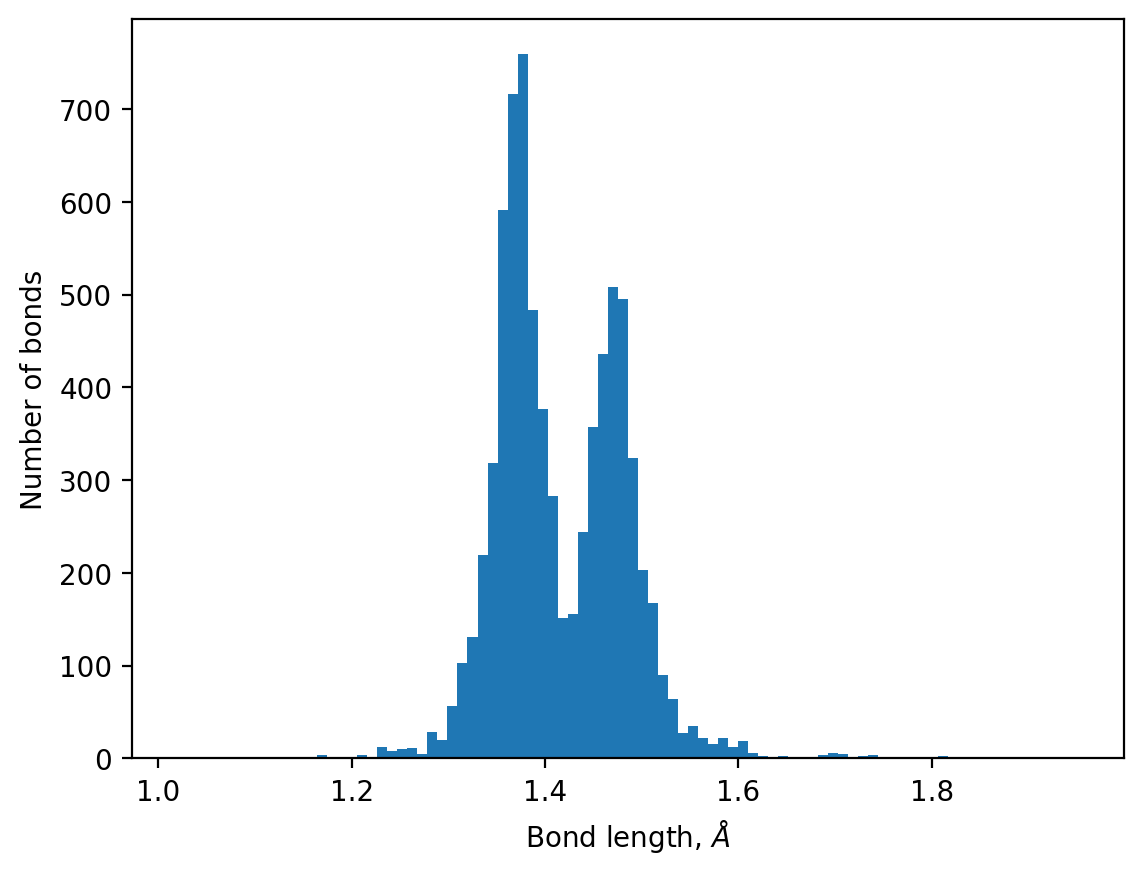

In [6]:
fig, axes = plt.subplots(dpi=200)
axes.hist(np.array(distances), bins='auto')
axes.set_xlabel('Bond length, $\AA$')
axes.set_ylabel('Number of bonds')